In [81]:
# import data using pandas (json format)
import pandas
import codecs

fileName = "abstract10000.json"
import json
from pprint import pprint
with open(fileName) as f:
    data = json.load(f)

from pandas.io.json import json_normalize
sample=json_normalize(data['items'])



# abstract - gene mappings (bigger than 100 mb)
"""
fileName = "gene2pubtator.txt"
doc = codecs.open(fileName,'rU','UTF-16')
g2a = pandas.read_csv(fileName, sep='\t')

#g2a.groupby(['PMID']).size().reset_index()[0:10]
sample['docid']=sample['docid'].astype('int')
sample.rename(columns={'docid':'PMID'}, inplace=True)
merged=sample.merge(g2a, left_on='PMID', right_on='PMID', how='inner')
g2a = merged[['PMID','NCBI_Gene','Mentions','Resource']]
g2a.to_csv('gene2pubtatorTruncated.txt', sep='\t',index=False)
"""
# truncated pubtator data import
fileName = "gene2pubtatorTruncated.txt"
doc = codecs.open(fileName,'rU','UTF-16')
g2a = pandas.read_csv(fileName, sep='\t')
g2a

,PMID,NCBI_Gene,Mentions,Resource
0,7800381,24493,interleukin-1 alpha,GNormPlus
1,7800381,24835,tumor necrosis factor alpha,GNormPlus
2,7800478,6256,retinoid X receptor|RXR,GNormPlus
3,7800482,852810,RPB9,gene2pubmed|GNormPlus
4,7800482,854068,ADH1,GNormPlus
5,7800489,6285,nef,GNormPlus
6,7800498,22882,RAF|RNA polymerase activating factor,GNormPlus
7,7800498,5781,non-structural protein 1|NS1,GNormPlus
8,7800499,20468888,cyclic AMP receptor protein|CAP,GNormPlus
9,7800457,717,CO2,GNormPlus


In [18]:
# estimate the average sentence length
import re
import statistics
size=[]
for line in sample.abstract:
    line=str(line)
    line=line.strip()
    stns=re.split('\. |\? |\! ',line)
    size.append(len(stns)-1)

statistics.mean([i for i in size if(i!=0)])

6.2243618450515

In [19]:
# input as matrix
sampleAbstract = sample.abstract.as_matrix()

# basic preprocessing
# normalize the token
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from gensim.parsing.porter import PorterStemmer

#nltk.download('stopwords')
#nltk.download('punkt')
# word_tokenize
def WordTokenizerFct(samples):
    samplesWordTokenizer = []
    for line in samples:
        tokens = word_tokenize(str(line))
        samplesWordTokenizer.append(tokens)
    return(samplesWordTokenizer)

#samplesWordTokenizer=WordTokenizerFct(sampleAbstract)

# remove the stopwords
nltk_words = list(stopwords.words('english'))
def StopwordsRemove(samples): 
    sampleTokenStopwordsRemoved = []
    for line in samples:
        tokenStopwordsRemoved = [w for w in line if not w in nltk_words]
        sampleTokenStopwordsRemoved.append(tokenStopwordsRemoved)
    return(sampleTokenStopwordsRemoved)

# remove stemming
def stemming(samples):
    newSamples = []
    for line in samples:
        newTokens = []
        for elmt in line:
            newTokens.append(PorterStemmer().stem(elmt))
        newSamples.append(newTokens)
    return(newSamples)

#samplesWordTokenizer = StopwordsRemove(samplesWordTokenizer)

#samplesWordTokenizerStemmed = stemming(samplesWordTokenizer)

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [20]:
# preprocess the abstract + map and gene symbol convention
%time
import re
sentenceResult = []
for line in sample.as_matrix():
    pmid = line[1]
    abstract = line[0]
    title = line[2]
    abstract=str(abstract)
    # for multiple paragrams
    abstract = re.sub(r"[\r\n]", " ", abstract)
    abstract = re.sub(r"\/"," ", abstract)
    # for the end sentence
    abstract = re.sub(r"\.\ ","$", abstract)
    abstract = re.sub(r"\!\ ","$", abstract)
    abstract = re.sub(r"\?\ ","$", abstract)
    #print(abstract)
    
    if(len(abstract)==0):
        continue
    if(len(g2a[g2a['PMID'].isin([pmid])].as_matrix())>1):
        #print(g2a[g2a['PMID'].isin([pmid])])
        mentions = g2a[g2a['PMID'].isin([pmid])].as_matrix()[:,2] 
        GeneIDs = g2a[g2a['PMID'].isin([pmid])].as_matrix()[:,1]
        # abstract segment into sentence
        pat = re.compile(r'([A-Z][^$]*[$])', re.M)
        sentences = pat.findall(str(abstract))
        #print(sentences)
        hashBin = dict()
        for index in range(0,len(mentions)):
            #print(gene)
            gene = mentions[index]
            geneID = GeneIDs[index]
            #print(gene)
            gene = re.sub(r"[\(\)]", "", gene)
            genes=gene.split("\|")
            #print(genes)
            for i in genes:             
                for sentenceIndex in range(0, len(sentences)):
                    sentence = sentences[sentenceIndex]
                    if(re.findall(i,sentence)):
                        #print(sentence)                  
                        findelmts = re.findall(i,sentence)
                        #print(findelmts)
                        for elmtKey in range(0,len(findelmts)):
                            # last update sentence retrivement
                            sentence = sentences[sentenceIndex]
                            wordtoken = findelmts[elmtKey]
                            # to avoid the tokenization issue make the wordtokenNew to be standarlized
                            #wordtokenNew = re.sub(" ","-",wordtoken)
                            
                            wordtokenNew = "-"+geneID+"-"
                            #print(wordtokenNew)
                            sentenceUpdate=re.sub(wordtoken,wordtokenNew,sentence)
                            sentenceUpdate=re.sub("--","- -",sentenceUpdate)
                            #print(sentenceUpdate)
                            sentences[sentenceIndex] = sentenceUpdate
                            
                            if sentenceIndex in hashBin.keys():
                                hashBin[sentenceIndex].append((wordtokenNew,geneID,elmtKey))
                            else:
                                hashBin[sentenceIndex] = [(wordtokenNew,geneID,elmtKey)]

        #print(hashBin)       
        for i in hashBin:
            if(len(hashBin[i])>1):
                sentence = sentences[i]     
                sentenceResult.append({"PMID":pmid,"sentence":sentence,"title":title,"metions":hashBin[i]})
                print({"PMID":pmid,"sentence":sentence,"title":title,"metions":hashBin[i]})

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs
{'PMID': 7800498, 'title': u'Regulation of influenza virus RNA polymerase activity by cellular and viral factors.', 'metions': [('-22882-', '22882', 0), ('-22882-', '22882', 1)], 'sentence': 'One of them, tentatively designated -22882- (-22882-), stimulated RNA synthesis with either RNP cores or RNA polymerase and nucleocapsid protein purified from RNP cores as the enzyme source$'}
{'PMID': 7800498, 'title': u'Regulation of influenza virus RNA polymerase activity by cellular and viral factors.', 'metions': [('-5781-', '5781', 0), ('-5781-', '5781', 1)], 'sentence': 'Of interest is that virus-coded -5781- (-5781-), which has been thought to be involved in regulation of replication, counteracted PRF function$'}
{'PMID': 7800505, 'title': u'Characterization of the promoter for the human 85 kDa cytosolic phospholipase A2 gene.', 'metions': [('-5321-', '5321', 0), ('-5321-', '5321', 1)], 'sentence': 'The 85 kDa -5321- (-5321-) 

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


{'PMID': 7800679, 'title': u'T-lymphocyte dysregulation in asthma.', 'metions': [('-15111-', '15111', 0), ('-51497-', '51497', 0)], 'sentence': 'The division of T helper lymphocytes into -51497- and -15111- cells, first described in studies of murine immunology, appear to be relevant in humans, particularly in allergic disease$'}
{'PMID': 7800688, 'title': u'Activation of SH2-containing proteins by insulin in proliferating mouse parotid gland acinar cells.', 'metions': [('-15461-', '15461', 0), ('-15461-', '15461', 1)], 'sentence': 'Hyperplasia of the parotid gland is mediated by the elevation of tyrosine phosphorylation of phospholipase C gamma, -15461- -GTPase activating protein (-15461- -GAP) and phosphatidylinositol 3-kinase$'}
{'PMID': 7800941, 'title': u'Effect of an elevated temperature on the replication of HIV1 in a monocytic cell line.', 'metions': [('-3569-', '3569', 0), ('-7124-', '7124', 0)], 'sentence': 'The amount of viral particles released from the cells 2 days after -

{'PMID': 7801889, 'title': u'Immunological events in regressing genital warts.', 'metions': [('-920-', '920', 0), ('-920-', '920', 1), ('-925-', '925', 0)], 'sentence': '-920- -positive lymphocytes predominated in regression, both within the wart stroma and the surface epithelium, where there was a significant change in the ratio of -920-+ to -925-+ cells (P < .01)$'}
{'PMID': 7801889, 'title': u'Immunological events in regressing genital warts.', 'metions': [('-3383-', '3383', 0), ('-6401-', '6401', 0), ('-7412-', '7412', 0)], 'sentence': 'There was no difference in Langerhans cell numbers, although there was significant induction of the immune accessory molecules HLA-DR and -3383- (P < .05) on keratinocytes, and -6401- and -7412- (P < .05) on endothelial cells in regressing warts$'}
{'PMID': 7801838, 'title': u'[Clinical study on renal pelvic and ureteral tumors].', 'metions': [('-58492-', '58492', 0), ('-7694-', '7694', 0)], 'sentence': 'The 5-year survival rate according to staging

{'PMID': 7802649, 'title': u'NGF stimulates differentiation of osteoblastic MC3T3-E1 cells.', 'metions': [('-11691-', '11691', 0), ('-16193-', '16193', 0)], 'sentence': 'The activities of NGF on induction of -16193-, -11691- and collagen were studied in cultured osteoblastic cells, MC3T3-E1$'}
{'PMID': 7802649, 'title': u'NGF stimulates differentiation of osteoblastic MC3T3-E1 cells.', 'metions': [('-11691-', '11691', 0), ('-16193-', '16193', 0)], 'sentence': 'Treatment of the cells with NGF induced -16193- production in a dose dependent manner and enhanced -11691- activity and collagen biosynthesis without affecting cell proliferation$'}
{'PMID': 7802654, 'title': u'Islet amyloid polypeptide stimulates cyclic AMP accumulation via the porcine calcitonin receptor.', 'metions': [('-24476-', '24476', 0), ('-796-', '796', 0)], 'sentence': 'CHO-cells stably transfected with an expression vector for the porcine calcitonin receptor were exposed to various concentrations of -24476-, -796- or c

{'PMID': 7803385, 'title': u'Functional characterization of human carbonic anhydrase II variants with altered zinc binding sites.', 'metions': [('-760-', '760', 0), ('-760-', '760', 1)], 'sentence': '-760- (-760-) contains a conserved His3 zinc polyhedron which is essential for catalysis$'}
{'PMID': 7803385, 'title': u'Functional characterization of human carbonic anhydrase II variants with altered zinc binding sites.', 'metions': [('-3347-', '3347', 0), ('-760-', '760', 0), ('-760-', '760', 1)], 'sentence': '-760- variants with a His ligand substituted with Cys, Asp, or Glu bind zinc only approximately 10-fold better than a -3347- zinc polyhedron in -760-$'}
{'PMID': 7803185, 'title': u'Central control of melanotrope cells of Xenopus laevis.', 'metions': [('-380532-', '380532', 0), ('-380532-', '380532', 1)], 'sentence': 'This adaptation is regulated by -380532- (-380532-)$'}
{'PMID': 7803191, 'title': u'Enhancement of interferon-beta production with sphingomyelin from fermented milk.

{'PMID': 7803293, 'title': u'Complement receptor type 1 (CR1) deficiency on neutrophils in myelodysplastic syndrome.', 'metions': [('-1378-', '1378', 0), ('-1378-', '1378', 1)], 'sentence': 'We present a patient with myelodysplastic syndromes (MDS) whose neutrophils exhibited defective expression of -1378- (-1378-)$'}
{'PMID': 7803293, 'title': u'Complement receptor type 1 (CR1) deficiency on neutrophils in myelodysplastic syndrome.', 'metions': [('-1378-', '1378', 0), ('-1378-', '1378', 1), ('-22815-', '22815', 0), ('-6998-', '6998', 0)], 'sentence': 'The expression of -1378- on neutrophils as identified by staining with -1378- was defective in the patient, and the expression of other complement receptors (-6998- and -22815-), Fc receptors and adhesion molecules was normal$'}
{'PMID': 7803295, 'title': u'Over-expression of the MDM2 gene is found in some cases of haematological malignancies.', 'metions': [('-4193-', '4193', 0), ('-7157-', '7157', 0), ('-7157-', '7157', 1)], 'sentence':

{'PMID': 7804167, 'title': u'Protection by dexamethasone from a lethal infection with Listeria monocytogenes in mice.', 'metions': [('-15978-', '15978', 0), ('-16193-', '16193', 0), ('-16193-', '16193', 1), ('-21926-', '21926', 0), ('-21926-', '21926', 1)], 'sentence': 'High titres of endogenous -21926- (-21926-), -16193- (-16193-) and gamma interferon (-15978-) were induced in the bloodstreams and organs of the drug-free mice$'}
{'PMID': 7804167, 'title': u'Protection by dexamethasone from a lethal infection with Listeria monocytogenes in mice.', 'metions': [('-15978-', '15978', 0), ('-16193-', '16193', 0), ('-21926-', '21926', 0)], 'sentence': 'DEX suppressed -16193- production, but augmented -21926- and -15978- production within 24 h of infection, whereas production of all three endogenous cytokines was suppressed in the DEX-treated mice on day 3 of infection when the control mice began to die$'}
{'PMID': 7803985, 'title': u'Hypothalamic monoamine oxidase activity in ovariectomized 

{'PMID': 7805043, 'title': u'Attenuation of G2 checkpoint function precedes human cell immortalization.', 'metions': [('-891-', '891', 0), ('-983-', '983', 0)], 'sentence': 'Irradiation with 1.5 Gy induced 98% inhibition of mitosis and 79% inhibition of -891- -983- kinase activity within 2 h$'}
{'PMID': 7805043, 'title': u'Attenuation of G2 checkpoint function precedes human cell immortalization.', 'metions': [('-891-', '891', 0), ('-983-', '983', 0)], 'sentence': 'SV40-transformed IMR-90 cells with extended in vitro proliferative lifespan and immortal derivative cells displayed significantly less radiation-induced G2 delay (60-70%) and less inhibition of -891- -983- protein kinase activity (43-46%) than was seen in normal cells$'}
{'PMID': 7805043, 'title': u'Attenuation of G2 checkpoint function precedes human cell immortalization.', 'metions': [('-891-', '891', 0), ('-983-', '983', 0)], 'sentence': 'The attenuation of G2 checkpoint function in SV40 transformed IMR-90 cells was assoc

{'PMID': 7804532, 'title': u'Stimulation of cytolytic activity by interleukin-10.', 'metions': [('-3458-', '3458', 0), ('-3458-', '3458', 1), ('-3558-', '3558', 0), ('-3586-', '3586', 0), ('-3586-', '3586', 1), ('-7124-', '7124', 0), ('-7124-', '7124', 1)], 'sentence': '-3586- (-3586-), originally identified as an inhibitor of cytokine and monokine synthesis [e.g., -3558-, -3458- (-3458-), and -7124- (-7124-)], modulates a wide range of immunologic activities$'}
{'PMID': 7804532, 'title': u'Stimulation of cytolytic activity by interleukin-10.', 'metions': [('-3458-', '3458', 0), ('-3586-', '3586', 0), ('-3586-', '3586', 1), ('-7124-', '7124', 0)], 'sentence': 'Induction of cytolytic activities by -3586- was neutralized by anti- -3586- monoclonal antibodies but not by antibodies against -3458- or -7124-$'}
{'PMID': 7804532, 'title': u'Stimulation of cytolytic activity by interleukin-10.', 'metions': [('-3439-', '3439', 0), ('-3558-', '3558', 0), ('-3586-', '3586', 0), ('-3586-', '3586',

{'PMID': 7805650, 'title': u"Glucocorticoid action and the clinical features of Cushing's syndrome.", 'metions': [('-2353-', '2353', 0), ('-3725-', '3725', 0), ('-3725-', '3725', 1)], 'sentence': 'The liganded receptors may interact with DNA at specific glucocorticoid responsive-elements, may physically hinder the ability of other transcription-regulating proteins to interact with their own DNA response-elements, and may form intranuclear complexes with the transcription factor -3725-, thus changing the number of -3725- -2353- heterodimers that bind at AP-1 sites$'}
{'PMID': 7805829, 'title': u'The 26S proteasome degrades mouse and yeast ornithine decarboxylase in yeast cells.', 'metions': [('-18263-', '18263', 0), ('-18263-', '18263', 1)], 'sentence': 'Recently, by demonstrating severe inhibition of mouse and yeast -18263- degradation in a mutant yeast cell line, defective in the chymotripsin-like activity of the yeast 20S proteasome, we implicated the 20S proteasome in the degradatio

{'PMID': 7806255, 'title': u'Immortalization of human primary B lymphocytes by simian virus 40 early region DNA.', 'metions': [('-2208-', '2208', 0), ('-3569-', '3569', 0), ('-3569-', '3569', 1)], 'sentence': 'These immortalized B lymphocytes grew in a suspension culture forming cell clumps, expressed -2208-, and had an -3569- (-3569-) susceptibility for immunoglobulin (Ig) production, although there was an absence of Epstein-Barr nuclear antigen$'}
{'PMID': 7806264, 'title': u'Phenotype of T cells, their soluble receptor levels, and cytokine profile of human breast milk.', 'metions': [('-3672-', '3672', 0), ('-3559-', '3559', 0), ('-3684-', '3684', 0), ('-920-', '920', 0), ('-920-', '920', 1), ('-920-', '920', 2), ('-920-', '920', 3), ('-925-', '925', 0), ('-925-', '925', 1), ('-925-', '925', 2), ('-925-', '925', 3), ('-940-', '940', 0)], 'sentence': 'Milk T cells had a more equivalent -920-:-925- ratio than blood; milk -920- T cells mainly expressed the -920-5RO (antigen primed memor

{'PMID': 7806143, 'title': u'Cytokine patterns and cytotoxic mediators in primary biliary cirrhosis.', 'metions': [('-4155-', '4155', 0), ('-4155-', '4155', 1)], 'sentence': 'We observed the deposition of the primary cytotoxic granule protein of eosinophils, -4155- (-4155-), within the portal region of livers from patients with PBC$'}
{'PMID': 7806143, 'title': u'Cytokine patterns and cytotoxic mediators in primary biliary cirrhosis.', 'metions': [('-3458-', '3458', 0), ('-3458-', '3458', 1), ('-3567-', '3567', 0), ('-3569-', '3569', 0), ('-7040-', '7040', 0), ('-7040-', '7040', 1)], 'sentence': 'Messenger RNA (mRNA) for interleukin (IL)-2, -3567-, -3569-, -3458- (-3458-), and -7040- (-7040-) were detected in the majority of the specimens from patients with PBC$'}
{'PMID': 7806561, 'title': u'Yeast NOP2 encodes an essential nucleolar protein with homology to a human proliferation marker.', 'metions': [('-4839-', '4839', 0), ('-4839-', '4839', 1)], 'sentence': 'The protein encoded by -4

{'PMID': 7807495, 'title': u'Accuracy of the Omron HEM 706 portable monitor for home measurement of blood pressure.', 'metions': [('-1628-', '1628', 0), ('-1628-', '1628', 1), ('-1628-', '1628', 2), ('-8991-', '8991', 0), ('-8991-', '8991', 1), ('-8991-', '8991', 2)], 'sentence': 'The device was satisfactory over the whole BP range (-8991- 89-188 mmHg, -1628- 44-118 mmHg), with a B grading for -8991- and a C grading for -1628- (British Hypertension Society protocol) and a PASS for both -8991- and -1628- (AAMI)$'}
{'PMID': 7807495, 'title': u'Accuracy of the Omron HEM 706 portable monitor for home measurement of blood pressure.', 'metions': [('-1628-', '1628', 0), ('-1628-', '1628', 1), ('-8991-', '8991', 0), ('-8991-', '8991', 1)], 'sentence': 'For the diastolic hypertensive range 90-120 mmHg, where most clinical decisions are made, the device scored a B grade for -8991- and an A grade for -1628-, with a PASS for both -8991- and -1628-$'}
{'PMID': 7807015, 'title': u'CTLA-4 binding to 

{'PMID': 7807508, 'title': u'Hypertrophy to failure.', 'metions': [('-1636-', '1636', 0), ('-1636-', '1636', 1)], 'sentence': '-1636- (-1636-) inhibitors, beta-blockers and calcium channel blockers produce the most rapid reversal of hypertrophy$'}
{'PMID': 7807750, 'title': u'[Role of eosinophils and cell adhesion molecules in the asthmatic response to allergen].', 'metions': [('-25464-', '25464', 0), ('-25464-', '25464', 1), ('-309684-', '309684', 0)], 'sentence': 'The effect of treatment with monoclonal antibody (MoAb) 1A29 against rat -25464- (-25464-) alone and a mixture of MoAb 1A29 and MoAb WT-3 against rat -309684- on asthmatic responses of the rats was studied$'}
{'PMID': 7807546, 'title': u'Contrasting rates of nucleotide substitution in the X-linked and Y-linked zinc finger genes.', 'metions': [('-103694540-', '103694540', 0), ('-22764-', '22764', 0)], 'sentence': 'We have sequenced the entire exon (approximately 1.180 bp) encoding the zinc finger domain of the X-linked and Y

{'PMID': 7809080, 'title': u'RAPT1, a mammalian homolog of yeast Tor, interacts with the FKBP12/rapamycin complex.', 'metions': [('-2284-', '2284', 0), ('-2287-', '2287', 0)], 'sentence': 'Using a two-hybrid system we isolated mammalian clones that interact with the human FK506 -2287- (-2284-) in the presence of rapamycin$'}
{'PMID': 7809080, 'title': u'RAPT1, a mammalian homolog of yeast Tor, interacts with the FKBP12/rapamycin complex.', 'metions': [('-2475-', '2475', 0), ('-2284-', '2284', 0)], 'sentence': 'A region of 133 amino acids of -2475- is sufficient for binding to the -2284- rapamycin complex$'}
{'PMID': 7808698, 'title': u'Sprouting of CA3 pyramidal neurons to the dentate gyrus in rat hippocampal organotypic cultures.', 'metions': [('-54232-', '54232', 0), ('-54232-', '54232', 1)], 'sentence': 'The -54232- to DG projection response was also observed in a -54232- mini-slice placed near a co-cultured whole hippocampal slice, when the DG in the latter was stimulated$'}
{'PMID

{'PMID': 7809009, 'title': u'Functional state of the beta cell affects expression of both forms of glutamic acid decarboxylase.', 'metions': [('-24379-', '24379', 0), ('-24380-', '24380', 0)], 'sentence': 'In this study, we investigated expression of -24380- and -24379- in isolated Sprague-Dawley rat islets cultured at different glucose concentrations$'}
{'PMID': 7809009, 'title': u'Functional state of the beta cell affects expression of both forms of glutamic acid decarboxylase.', 'metions': [('-24379-', '24379', 0), ('-24380-', '24380', 0)], 'sentence': 'Using GAD isoform-specific antibodies in an immunoblot assay, we found that expression of both -24380- and -24379- in cultured islets was glucose dependent and that increased expression of both forms of GAD correlated with increased functional state of the beta cell$'}
{'PMID': 7809156, 'title': u'A role for deregulated c-Myc expression in apoptosis of Epstein-Barr virus-immortalized B cells.', 'metions': [('-4609-', '4609', 0), ('-5

{'PMID': 7809460, 'title': u'[Pulmonary inflammation in systemic sclerosis. An assessment by bronchoalveolar lavage].', 'metions': [('-925-', '925', 0), ('-925-', '925', 1)], 'sentence': 'T cell subsets, evaluated by flow cytometry, showed a significant increase of -925-+ T cells (36.6 + - 3.2 vs 25, 1 + - 3.3; p = 0.04) and a decrease of CD4+ -925-+ ratio (1.1 + - 0.1 vs 2.1 + - 0.4; p = 0.04)$'}
{'PMID': 7809497, 'title': u'Inhaled budesonide for maintenance treatment of pulmonary sarcoidosis.', 'metions': [('-1636-', '1636', 0), ('-567-', '567', 0)], 'sentence': 'Serum -1636-, lysozyme and -567- values decreased significantly$'}
{'PMID': 7809505, 'title': u'Molecular pathology of human neuroblastomas.', 'metions': [('-4613-', '4613', 0), ('-4914-', '4914', 0)], 'sentence': 'These include hyperdiploidy, deletion of 1p, amplification of -4613-, and expression of the neurotrophin receptor, -4914-$'}
{'PMID': 7809506, 'title': u"Nephroblastoma (Wilms' tumor): a model system of aberrant 

{'PMID': 7810695, 'title': u'Differential effects of extracellular anions on renin secretion from isolated perfused rat kidneys.', 'metions': [('-24179-', '24179', 0), ('-24179-', '24179', 1), ('-24179-', '24179', 2), ('-24715-', '24715', 0)], 'sentence': 'Activation of -24715- secretion by isethionate and acetate was blunted with 100 pmol l -24179- (-24179-), whereas tenfold higher concentrations of -24179- were required to attenuate the effect of nitrate ions$'}
{'PMID': 7810707, 'title': u'Expression of acid-base-related proteins in mesonephric kidney of the rabbit.', 'metions': [('-100009156-', '100009156', 0), ('-100009226-', '100009226', 0)], 'sentence': 'From total RNA, we detected expression of -100009156- and -100009226- mRNA$'}
{'PMID': 7810707, 'title': u'Expression of acid-base-related proteins in mesonephric kidney of the rabbit.', 'metions': [('-100009156-', '100009156', 0), ('-100009226-', '100009226', 0)], 'sentence': 'Microdissected proximal and collecting tubules abun

{'PMID': 7810654, 'title': u'In vitro and in vivo regulation of hepatic mitogen-activated protein kinases in fetal rats.', 'metions': [('-24547-', '24547', 0), ('-24547-', '24547', 1), ('-24827-', '24827', 0), ('-24827-', '24827', 1)], 'sentence': 'With -24547- (-24547-) as the phosphate acceptor, kinase activity in cultured fetal hepatocyte lysates increased fourfold after exposure to -24827- (-24827-) for 10 min$'}
{'PMID': 7810654, 'title': u'In vitro and in vivo regulation of hepatic mitogen-activated protein kinases in fetal rats.', 'metions': [('-24547-', '24547', 0), ('-24827-', '24827', 0)], 'sentence': 'This -24827- -responsive -24547- kinase activity was accounted for by five distinct MAP kinase isoforms detected by Western immunoblotting$'}
{'PMID': 7810329, 'title': u'Vasoinhibitory activity of synthetic peptides from the amino terminus of chromogranin A.', 'metions': [('-1113-', '1113', 0), ('-1113-', '1113', 1)], 'sentence': 'Naturally occurring amino terminal fragments o

{'PMID': 7811541, 'title': u'Combination therapy: more effective control of HIV type 1?', 'metions': [('-71-', '71', 0), ('-920-', '920', 0)], 'sentence': 'The results of -71- protocol 155 revealed benefit of zidovudine and zalcitabine over monotherapy with either agent in patients with -920-+ cell counts > or = 150 cells mm3$'}
{'PMID': 7811716, 'title': u'Interaction between apo A-I-containing lipoproteins and lecithin:cholesterol acyltransferase.', 'metions': [('-335-', '335', 0), ('-335-', '335', 1), ('-335-', '335', 2), ('-335-', '335', 3), ('-3931-', '3931', 0), ('-3931-', '3931', 1), ('-53369-', '53369', 0), ('-57338-', '57338', 0)], 'sentence': '-57338- and -53369- subfractions of two species of -335- -containing lipoprotein, one containing only -335- (LpA-I) and the other containing both -335- and -335-I (LpA-I A-II), were tested for reactivity to -3931- (-3931-)$'}
{'PMID': 7811716, 'title': u'Interaction between apo A-I-containing lipoproteins and lecithin:cholesterol acyltr

{'PMID': 7811636, 'title': u'Developmental expression of PC3 gene is correlated with neuronal cell birthday.', 'metions': [('-29619-', '29619', 0), ('-310738-', '310738', 0), ('-310738-', '310738', 1)], 'sentence': 'We examined the developmental expression of -29619-, a -310738- (-310738-) early induced gene in PC12 cells, in the rat central nervous system (CNS) and we found that it represents a molecular marker of ongoing postmitotic neurons production$'}
{'PMID': 7811638, 'title': u'Molecular characterization of ovarian tumors in Drosophila.', 'metions': [('-31442-', '31442', 0), ('-3772180-', '3772180', 0), ('-3772180-', '3772180', 1)], 'sentence': 'We demonstrate that the tumorous cells produced by mutations in the ovarian tumor (otu), -3772180- (-3772180-) and sans fille (-31442-) genes are capable of female-specific transcription and RNA processing$'}
{'PMID': 7812093, 'title': u'[Transforming growth factors beta 1 and 2 inhibit proliferation of limbus and corneal epithelium].', 

{'PMID': 7812546, 'title': u'T-cell receptor V gene expression in HLA-typed Japanese patients with pulmonary sarcoidosis.', 'metions': [('-920-', '920', 0), ('-925-', '925', 0)], 'sentence': 'For purposes of comparison, we have in this study investigated TCR V gene usage and gamma delta TCR expression in -920-+ and -925-+ T cells in bronchoalveolar lavage (BAL) fluid and peripheral blood in an ethnically distinct and homogenous group of individuals consisting of Japanese sarcoidosis patients and healthy controls$'}
{'PMID': 7812546, 'title': u'T-cell receptor V gene expression in HLA-typed Japanese patients with pulmonary sarcoidosis.', 'metions': [('-920-', '920', 0), ('-925-', '925', 0)], 'sentence': 'Expansions of T-cell subsets were readily detected in the -925-+ T-cell population, while a more homogenous staining pattern was found in the -920-+ T-cell population$'}
{'PMID': 7813101, 'title': u'IL-8 release from cultured peripheral blood monocytes of patients with glomerulonephriti

{'PMID': 7813707, 'title': u'Clonal T-lymphocytes from untreated hairy-cell leukaemia patients enhance the growth of BFU-E.', 'metions': [('-920-', '920', 0), ('-920-', '920', 1), ('-925-', '925', 0), ('-925-', '925', 1)], 'sentence': 'Altogether, 24 -920-+ -925- - and 17 -920- - -925-+ T-lymphocyte clones from 3 different HCL patients were tested$'}
{'PMID': 7813707, 'title': u'Clonal T-lymphocytes from untreated hairy-cell leukaemia patients enhance the growth of BFU-E.', 'metions': [('-920-', '920', 0), ('-920-', '920', 1), ('-925-', '925', 0), ('-925-', '925', 1)], 'sentence': 'Likewise, no difference in the extent of enhancement was seen between -920-+ -925- - and -920- - -925-+ clones, or whether the clones were tested for modulation of BFU-E from PBMNC-T of autologous or allogeneic origin$'}
{'PMID': 7813357, 'title': u'p53 immunolocalization in cytology specimens: a study in human esophageal carcinoma.', 'metions': [('-7157-', '7157', 0), ('-7157-', '7157', 1)], 'sentence': 'Im

{'PMID': 7813478, 'title': u'A novel form of mouse cytochrome P450 3A (Cyp3a-16). Its cDNA cloning and expression in fetal liver.', 'metions': [('-13112-', '13112', 0), ('-13113-', '13113', 0)], 'sentence': 'This clone encoded a polypeptide of 504 deduced amino acids and showed 87.3% and 66.6% amino acid identities with mouse -13112- and -13113-, respectively$'}
{'PMID': 7814722, 'title': u'Galctopoietic effects of a (1-30)NH2 analog of growth hormone-releasing factor in dairy cows.', 'metions': [('-104978413-', '104978413', 0), ('-280804-', '280804', 0), ('-281191-', '281191', 0)], 'sentence': 'In summary, a -281191- analog increased milk yield and serum concentrations of -280804- and -104978413-$'}
{'PMID': 7814722, 'title': u'Galctopoietic effects of a (1-30)NH2 analog of growth hormone-releasing factor in dairy cows.', 'metions': [('-104978413-', '104978413', 0), ('-280804-', '280804', 0)], 'sentence': 'Infusion of the analog increased mean serum concentrations of -280804-, -104978

{'PMID': 7814849, 'title': u'Calcium metabolic changes and calbindin-D in experimental hypertension.', 'metions': [('-24249-', '24249', 0), ('-83839-', '83839', 0)], 'sentence': 'Both prehypertensive and hypertensive SHR had significantly lower concentrations of both renal -83839- -D28k and intestinal -24249- than Wistar control rats$'}
{'PMID': 7814849, 'title': u'Calcium metabolic changes and calbindin-D in experimental hypertension.', 'metions': [('-24249-', '24249', 0), ('-83839-', '83839', 0)], 'sentence': 'Induction of hypertension in Dahl-S rats reduced intestinal -24249- and increased plasma levels of 1,25(OH)2 vitamin D, while renal -83839- -D28k levels, plasma calcium levels and plasma magnesium levels were unchanged$'}
{'PMID': 7814849, 'title': u'Calcium metabolic changes and calbindin-D in experimental hypertension.', 'metions': [('-24249-', '24249', 0), ('-83839-', '83839', 0)], 'sentence': 'Renovascular hypertension was associated with a significant increase in the intes

{'PMID': 7814972, 'title': u'Influence of X-rays on early response gene expression in rat astrocytes and brain tumour cell lines.', 'metions': [('-24516-', '24516', 0), ('-24516-', '24516', 1), ('-314322-', '314322', 0)], 'sentence': 'The effects of ionizing radiation on -314322-, c- -24516- and -24516- -B mRNA levels were determined in cultures of rat perinatal type 1 astrocytes and two rat brain tumour cell lines, 175A and 9L$'}
{'PMID': 7814972, 'title': u'Influence of X-rays on early response gene expression in rat astrocytes and brain tumour cell lines.', 'metions': [('-24516-', '24516', 0), ('-24516-', '24516', 1), ('-314322-', '314322', 0)], 'sentence': 'In astrocyte cultures X-ray doses as low as 1 Gy induced the expression of -314322- and -24516- -B but had essentially no effect on c- -24516-$'}
{'PMID': 7814972, 'title': u'Influence of X-rays on early response gene expression in rat astrocytes and brain tumour cell lines.', 'metions': [('-24516-', '24516', 0), ('-24516-', '24

In [38]:
print(len(sentenceResult))

935


In [39]:
# word2vec find the cosine similarity word
from gensim.models import Word2Vec
# run first 100 sentences for the time saving
model_brown = Word2Vec(samplesWordTokenizerStemmed, size=7) 
#print(model_brown)
vectors_brown=model_brown[model_brown.wv.vocab]
label_brown=[i for i in model_brown.wv.vocab]

#print(vectors_brown)
#print(label_brown)

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [34]:
# negation lexicon extension using cosine similarity
negationLex=["ain't", "cannot", "cant", "daren't", "didn't", "doesn't", "don't", "hadn't", "hardly", "hasn't",
"haven't", "havn't", "isn't", "lack", "lacking", "lacks", "neither", "never", "no", "nobody",
"none", "nor", "not", "nothing", "nowhere","mightnt", "mustn't", "needn't", "oughtn't", "shan't","shouldn't", "wasn't",
             "without", "wouldnt", "n't"]

exist = []
existNegation = []
for negation in negationLex:
    if(negation in label_brown):
        exist.append("yes")
        existNegation.append(negation)
    else:
        exist.append("no")

import numpy as np
array=np.column_stack((negationLex, exist))
print(existNegation)
print("Node2vec most similar to election: %s" %(model_brown.wv.most_similar(positive=existNegation,topn=1000)))

['lack', 'neither', 'never', 'no', 'none', 'nor', 'not', 'without', "n't"]
Node2vec most similar to election: [('somewhat', 0.9761661291122437), ('foscarnet', 0.9651433229446411), ('substanti', 0.9585098028182983), ('wors', 0.9583584666252136), ('sed', 0.9583361148834229), ('quit', 0.9580072164535522), ('even', 0.9542026519775391), ('deficit', 0.953931450843811), ('uncorrel', 0.9527866840362549), ('tendenc', 0.948682427406311), ('much', 0.947737991809845), ('reinfect', 0.9466612339019775), ('intrud', 0.9466169476509094), ('faster', 0.9424477815628052), ('delai', 0.9411241412162781), ('unfavour', 0.9402629733085632), ('lymphoprolif', 0.9399603605270386), ('an/v', 0.9392751455307007), ('excess', 0.9381123781204224), ('obes', 0.937504768371582), ('circumstanti', 0.9372375011444092), ('numb', 0.9367417693138123), ('dermatologist', 0.9363306760787964), ('ihd', 0.9354044198989868), ('treatabl', 0.9329036474227905), ('toxic', 0.9320580959320068), ('glandular', 0.931542158126831), ('hypertrigl

In [40]:
# expand negations with the human annotated negations
negationNew=["littl","unlik","inabl","fail"]
negationLexNew=negationLex+negationNew
print(negationLexNew)

["ain't", 'cannot', 'cant', "daren't", "didn't", "doesn't", "don't", "hadn't", 'hardly', "hasn't", "haven't", "havn't", "isn't", 'lack', 'lacking', 'lacks', 'neither', 'never', 'no', 'nobody', 'none', 'nor', 'not', 'nothing', 'nowhere', 'mightnt', "mustn't", "needn't", "oughtn't", "shan't", "shouldn't", "wasn't", 'without', 'wouldnt', "n't", 'littl', 'unlik', 'inabl', 'fail']


In [41]:
# extract the sentence containing the negation words
data = []
negationSamples = []
for i in sentenceResult:
    sentenceTokens = WordTokenizerFct([i['sentence']])[0]
    signal = 0
    for token in sentenceTokens:        
        if(token in negationLexNew):            
            signal = 1                              
    if(signal == 1):
        negationSamples.append(i)
print(len(negationSamples))

118


In [37]:
# export the negation example for human annotation
allSampleData = [] 
Write = open(r"negationSamples.txt","w")
for line in negationSamples:
    mentions = line['metions']
    for geneIndexA in range(0,len(mentions)):
        for geneIndexB in range(geneIndexA+1,len(mentions)):
            geneA = mentions[geneIndexA]
            geneB = mentions[geneIndexB]
            if(not geneA[1] == geneB[1] and not geneA[0] == geneB[0]):
                Write.write(str(line['PMID']))
                geneAnew = geneA[0]+">"+geneA[1]+">"+str(geneA[2])
                geneBnew = geneB[0]+">"+geneB[1]+">"+str(geneB[2])
                Write.write("\t"+line['sentence'])
                Write.write("\t"+geneAnew)
                Write.write("\t"+geneBnew)
                Write.write("\n")
                allSampleData.append([line['sentence'],geneAnew,geneBnew])
                
Write.close()


In [42]:
# build the tagger functions
import nltk
from nltk.tag import PerceptronTagger
#nltk.download('averaged_perceptron_tagger')
#nltk.download('brown')
#nltk.download('book')
tagger = PerceptronTagger()
def precptTagged(negationSamples):
    negationSamplesPerceptronTagged = []
    for line in negationSamples:
        sentence = re.sub("\$",".",line['sentence'])
        sentenceTokens = WordTokenizerFct([sentence])[0]
        sentenceTokens = sentenceTokens[0:len(sentenceTokens)]
        sentenceTokensTagged = tagger.tag(sentenceTokens)
        negationSamplesPerceptronTagged.append(sentenceTokensTagged)
    return(negationSamplesPerceptronTagged)
#print(precptTagged(negationSamples))
def PosTagged(negationSamples):
    negationSamplesPosTagged = []
    for line in negationSamples:
        sentence = re.sub("\$",".",line['sentence'])
        sentenceTokens = WordTokenizerFct([sentence])[0]
        sentenceTokens = sentenceTokens[0:len(sentenceTokens)]
        tagged = nltk.pos_tag(sentenceTokens)
        negationSamplesPosTagged.append(tagged)
    return(negationSamplesPosTagged)

def sentenceTagger(sentence):
    sentence = re.sub("\$",".",sentence)
    sentenceTokens = WordTokenizerFct([sentence])[0]
    sentenceTokens = sentenceTokens[0:len(sentenceTokens)]
    sentenceTokensTagged = tagger.tag(sentenceTokens)
    for i in range(len(sentenceTokensTagged)): 
        word=sentenceTokensTagged[i][0]
        if(re.search("-\d+-",word)):
            sentenceTokensTagged[i] = (word,'NNP')
    return(sentenceTokensTagged)


In [43]:
# build pairs2negation feature based extraction function
def pairs2negation(doc, source, target,isolatorTokens=[]):
    hashTable={}
    hashTable['bias']=""
    
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    Negations = []
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if token in negationLexNew:
            Negations.append([token,tokenIndex])
    sourceElmts=source.split(">")
    targetElmts=target.split(">")
    sourceSymbol = sourceElmts[0]
    targetSymbol = targetElmts[0]
    sourceList = sourceElmts[2]
    targetList = targetElmts[2]    
    
    tokenSourceSet = []
    tokenTargetSet = []
    #print(tokens)
    #print(sourceSymbol+"\t"+targetSymbol+"\n")
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        
        # ( or ) problem
        if(len(token)==1):
            continue
        if(re.search(sourceSymbol,token) or re.search(token,sourceSymbol)):
            tokenSourceSet.append(tokenIndex)
        if(re.search(targetSymbol,token) or re.search(token,targetSymbol)):        
            tokenTargetSet.append(tokenIndex)
    try:
        tokenSource=tokenSourceSet[int(sourceList)]
        #print(tokenSource)
    except:
        print("error since the tokenSourceSet")
        print(tokens)
        print(source)
        print(tokenSourceSet)
        print(re.search(token,sourceSymbol))
        print(int(sourceList))        
    try:
        tokenTarget=tokenTargetSet[int(targetList)]
        #print(tokenTarget)
    except:
        print("error since the tokenTargetSet")
        print(tokens)
        print(target)
        print(tokenTargetSet)
        print(int(targetList))
    #print(str(tokenSource)+"\t"+str(tokenTarget))
    if(len(isolatorTokens)==0):
        for negationIndex in range(0,len(Negations)):
            negation = Negations[negationIndex][0]
            tokenPos = Negations[negationIndex][1]
            #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
            # Common features for all words

            hashTable[str(negationIndex) +'word.lower']=str(negation.lower())
            hashTable[str(negationIndex)+'word.captialized']= str(negation[0].upper() == negation[0])
            hashTable[str(negationIndex)+'postag']=  str(tags[tokenPos])
            hashTable[str(negationIndex)+'postag-1']= "" if tokenPos <= 1 else str(tags[tokenPos-1])
            hashTable[str(negationIndex)+'postag-2']= "" if tokenPos <= 2 else str(tags[tokenPos-2])
            hashTable[str(negationIndex)+'postag+1']= "" if len(tags)-tokenPos <= 1 else str(tags[tokenPos+1])
            hashTable[str(negationIndex)+'postag+2']= "" if len(tags)-tokenPos <= 2 else str(tags[tokenPos+2])
            hashTable[str(negationIndex)+'toSource']= str(tokenPos - tokenSource>0)
            hashTable[str(negationIndex)+'toTarget']= str(tokenPos - tokenTarget>0)
    else:
        newIndex = 0
        for negationIndex in range(0,len(Negations)):
            for isolatorTkn in isolatorTokens:
                negation = Negations[negationIndex][0]
                tokenPos = Negations[negationIndex][1]#print(str(tokenPos)+"\t"+str(len(tags))+"\n")
                # Common features for all words
                if(tokenPos in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenSource in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenTarget in range(isolatorTkn['start'],isolatorTkn['end']+1)):
                    hashTable[str(newIndex) +'word.lower']=str(negation.lower())
                    hashTable[str(newIndex)+'word.captialized']= str(negation[0].upper() == negation[0])
                    hashTable[str(newIndex)+'postag']=  str(tags[tokenPos])
                    hashTable[str(newIndex)+'postag-1']= "" if tokenPos <= 1 else str(tags[tokenPos-1])
                    hashTable[str(newIndex)+'postag-2']= "" if tokenPos <= 2 else str(tags[tokenPos-2])
                    hashTable[str(newIndex)+'postag+1']= "" if len(tags)-tokenPos <= 1 else str(tags[tokenPos+1])
                    hashTable[str(newIndex)+'postag+2']= "" if len(tags)-tokenPos <= 2 else str(tags[tokenPos+2])
                    hashTable[str(newIndex)+'toSource']= str(tokenPos - tokenSource>0)
                    hashTable[str(newIndex)+'toTarget']= str(tokenPos - tokenTarget>0)
                    newIndex+=1
    return hashTable
# example
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2negation(sentenceTagger(sentence),'-3569->3569>0','-7124->7124>0')

{'0postag': 'RB',
 '0postag+1': 'DT',
 '0postag+2': 'NN',
 '0postag-1': 'VBD',
 '0postag-2': 'DT',
 '0toSource': 'True',
 '0toTarget': 'True',
 '0word.captialized': 'False',
 '0word.lower': 'not',
 'bias': ''}

In [44]:
# read human annotations
ReadRef = open(r"negationAnnotated.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    pmid=elmts.pop(0)
    sentence=elmts.pop(0)
    #print(pmid+"\n"+sentence+"\n")
    #print(elmts)
    label = elmts[2]
    source = elmts[0]
    target = elmts[1]
    labelData.append([label,source,target,sentence])
print(len(labelData))

118


In [45]:
# transform to dataset negation function
def transform_to_dataset_neg(tagged_sentences):
    X, y = [], []

    for tagged in tagged_sentences:
        X.append(pairs2negation(sentenceTagger(tagged[3]), tagged[1],tagged[2]))
        y.append(tagged[0])
    return X, y

X,y=transform_to_dataset_neg(labelData)

In [46]:
# classifiers construction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
#from sknn.mlp import Classifier, Layer
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import sys
all_sentence=labelData
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
clfDecisionTree = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
clfSVM = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', svm.SVC(random_state=42))
])
clfLogistic = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', LogisticRegression(random_state=42))
])
#clfNeural = Pipeline([
#    ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
#    ('neural network', Classifier(layers=[Layer("Softmax")], n_iter=25, random_state=42))
#])
performance = []
for train_index, test_index in kf.split(all_sentence):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))
    X, y = transform_to_dataset_neg([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTree.fit(X, y)
    clfLogistic.fit(X, y)
    clfSVM.fit(X, y)
    #clfNeural.fit(X, y)
    X_test, y_test = transform_to_dataset_neg([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy of decisiontree:", clfDecisionTree.score(X_test, y_test))
    print("Accuracy of logistic:", clfLogistic.score(X_test, y_test))
    print("Accuracy of SVM:", clfSVM.score(X_test, y_test))
    performance.append([clfDecisionTree.score(X_test, y_test),clfLogistic.score(X_test, y_test),clfSVM.score(X_test, y_test)])
    #for i in range(len(y_test)):     
    #    sys.stdout.write(y_test[i])
    #    sys.stdout.write(clfDecisionTree.predict(X_test)[i])
    #    sys.stdout.write(clfLogistic.predict(X_test)[i])
    #    print(clfSVM.predict(X_test)[i])
    


KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 94, 'TEST:', 24)
('Accuracy of decisiontree:', 0.75)
('Accuracy of logistic:', 0.625)
('Accuracy of SVM:', 0.5833333333333334)
('TRAIN:', 94, 'TEST:', 24)
('Accuracy of decisiontree:', 0.8333333333333334)
('Accuracy of logistic:', 0.75)
('Accuracy of SVM:', 0.5416666666666666)
('TRAIN:', 94, 'TEST:', 24)
('Accuracy of decisiontree:', 0.7083333333333334)
('Accuracy of logistic:', 0.6666666666666666)
('Accuracy of SVM:', 0.5416666666666666)
('TRAIN:', 95, 'TEST:', 23)
('Accuracy of decisiontree:', 0.6086956521739131)
('Accuracy of logistic:', 0.6521739130434783)
('Accuracy of SVM:', 0.4782608695652174)
('TRAIN:', 95, 'TEST:', 23)
('Accuracy of decisiontree:', 0.5652173913043478)
('Accuracy of logistic:', 0.43478260869565216)
('Accuracy of SVM:', 0.4782608695652174)


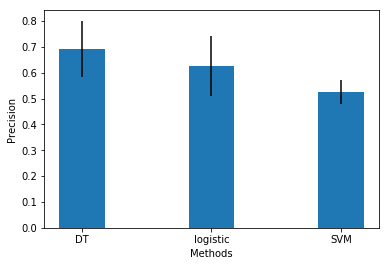

[0.6931159420289855, 0.6257246376811594, 0.5246376811594203]
[0.1079503433183901, 0.11648987414899227, 0.04562556735598304]


In [48]:
# 
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35   
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [49]:
# train negation classifier using all annotated data
negclf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
X, y = transform_to_dataset_neg(all_sentence)
negclf.fit(X, y) 
print('negation clssifier training completed')

negation clssifier training completed


In [50]:
# isolator lexicon build
isolatorLex = ['then','but','and']
stemming(WordTokenizerFct(['then','but','and']))
print("Node2vec most similar to isolator: %s" %(model_brown.wv.most_similar(positive=isolatorLex,topn=1000)))

Node2vec most similar to isolator: [('intrathec', 0.9933818578720093), ('theophyllin', 0.9929987788200378), ('latex', 0.9905354976654053), ('planu', 0.9899501204490662), ('dentur', 0.9887742400169373), ('hypokalem', 0.9875987768173218), ('carer', 0.9868318438529968), ('titl', 0.9867568016052246), ('subgingiv', 0.9861003160476685), ('down', 0.9858946800231934), ('pedal', 0.9846561551094055), ('gallium', 0.9842700362205505), ('158', 0.9837156534194946), ('captopril', 0.9835785627365112), ('183', 0.9835026860237122), ('delirium', 0.9834079146385193), ('hyperbar', 0.9827196598052979), ('vincristin', 0.9826561212539673), ('kt/v', 0.9826207756996155), ('sundsval', 0.9825419783592224), ('mildli', 0.9820285439491272), ('cumul', 0.9819716215133667), ('provoc', 0.9814160466194153), ('steadili', 0.9810672402381897), ('cyclosporin', 0.9809460639953613), ('workload', 0.9804495573043823), ('insecticid', 0.9801276326179504), ('escal', 0.9798210859298706), ('tmj', 0.9792442917823792), ('480', 0.978817

In [51]:
# extract isolator examples
isolatorHash = {}
for isolator in isolatorLex:
    isolatorHash[isolator] = 0
print(isolatorHash)
import copy
isolatorSamples = []
for i in sentenceResult:
    Hash=copy.deepcopy(isolatorHash)
    sentenceTokens = WordTokenizerFct([i['sentence']])[0]
    signal = 0
    for token in sentenceTokens:    
        if(token in isolatorLex):
            signal = 1
            pst=Hash[token]
            tokenString = token+'>'+str(pst)
            isolatorSamples.append({"sentence":i['sentence'],"isltr":tokenString})
            Hash[token] = Hash[token]+1
        
print(len(isolatorSamples))


{'and': 0, 'then': 0, 'but': 0}
1169


In [52]:
# export the isolator examples
isolatorSamples[0]
Write = open(r"isolatorSamples.txt","w")
for isolator in isolatorSamples:
    sentence = isolator["sentence"]
    isltr = isolator["isltr"]
    Write.write(sentence+"\t"+isltr+"\n")

In [53]:
# build pairs2isolator feature-based extraction function
def pairs2isolator(doc, isolatorString):
    hashTable={}
    hashTable['bias']=""
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    isolatorArray = isolatorString.split(">")
    isolator = isolatorArray[0]
    isolatorPst = isolatorArray[1]
    isolatorSet = []
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if token == isolator:
            isolatorSet.append([token,tokenIndex])
    #print(isolatorSet)
    #print(doc)
    #print(isolatorString)
    word = isolatorSet[int(isolatorPst)][0]
    wordPst = isolatorSet[int(isolatorPst)][1]

    #print(str(tokenSource)+"\t"+str(tokenTarget))
    #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
    # Common features for all words           
    hashTable['word.lower']=str(word.lower())
    hashTable['word-1']=str(tokens[wordPst-1])
    hashTable['word.captialized']= str(word[0].upper() == word[0])
    hashTable['postag']=  str(tags[wordPst])
    hashTable['postag-1']= "" if wordPst <= 1 else str(tags[wordPst-1])
    hashTable['postag-2']= "" if wordPst <= 2 else str(tags[wordPst-2])
    hashTable['postag+1']= "" if len(tags)-wordPst <= 1 else str(tags[wordPst+1])
    hashTable['postag+2']= "" if len(tags)-wordPst <= 2 else str(tags[wordPst+2])
    return hashTable
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2isolator(sentenceTagger(sentence),"and>0")

{'bias': '',
 'postag': 'CC',
 'postag+1': 'DT',
 'postag+2': 'VBD',
 'postag-1': ',',
 'postag-2': 'NNP',
 'word-1': ',',
 'word.captialized': 'False',
 'word.lower': 'and'}

In [54]:
# read the human annotated isolator examples
ReadRef = open(r"isolatorAnnotated.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    sentence=elmts.pop(0)
    #print(line+"\n")
    #print(elmts)
    label = elmts[1]
    isolator = elmts[0]
    labelData.append([label,isolator,sentence])


In [55]:
# transform to dataset isolator function
def transform_to_dataset_iso(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        X.append(pairs2isolator(sentenceTagger(tagged[2]), tagged[1]))
        y.append(tagged[0])
    return X, y
X,y=transform_to_dataset_iso(labelData)

In [56]:
# internal performance evaluation of isolator classifier
all_sentence=labelData
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
performance = []
for train_index, test_index in kf.split(all_sentence):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))
    X, y = transform_to_dataset_iso([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTree.fit(X, y)
    clfLogistic.fit(X, y)
    clfSVM.fit(X, y)
    #clfNeural.fit(X, y)
    X_test, y_test = transform_to_dataset_iso([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy of decisiontree:", clfDecisionTree.score(X_test, y_test))
    print("Accuracy of logistic:", clfLogistic.score(X_test, y_test))
    print("Accuracy of SVM:", clfSVM.score(X_test, y_test))
    performance.append([clfDecisionTree.score(X_test, y_test),clfLogistic.score(X_test, y_test),clfSVM.score(X_test, y_test)])

    #for i in range(len(y_test)):     
    #    sys.stdout.write(y_test[i])
    #    sys.stdout.write(clfDecisionTree.predict(X_test)[i])
    #    sys.stdout.write(clfLogistic.predict(X_test)[i])
    #    print(clfSVM.predict(X_test)[i])

KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 1.0)
('Accuracy of logistic:', 1.0)
('Accuracy of SVM:', 0.2)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.8)
('Accuracy of SVM:', 0.8)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 1.0)
('Accuracy of logistic:', 1.0)
('Accuracy of SVM:', 0.4)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 1.0)
('Accuracy of SVM:', 0.4)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.8)
('Accuracy of SVM:', 0.6)


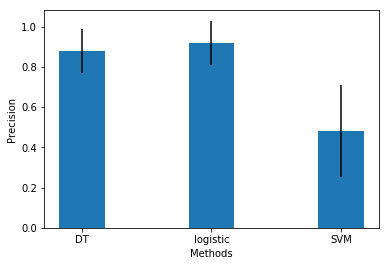

[0.8800000000000001, 0.9199999999999999, 0.48]
[0.1095445115010332, 0.1095445115010332, 0.2280350850198276]


In [57]:
# The isolation result plot
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [58]:
# train negation classifier using all annotated data
all_sentence=labelData
isoclf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', LogisticRegression(random_state=42))
])
X, y = transform_to_dataset_iso(all_sentence)
isoclf.fit(X, y) 
print('isolator clssifier training completed')

isolator clssifier training completed


In [59]:
# build regulation (activate) lexicon and stemmed regulation (activate) lexicon
positiveLex = ['activate', 'activation', 'activator', 'stimulatory', 'stimulation', 'stimulate', 'increase','increased']
cosPosLex = ['activated','stimulated','activates','elevation','-stimulated','increases','up-regulation','activators','upregulate','enhanced','enhancement','stimulating','stimulator','elevate','augments','trigger','upregulates','inducer','up-regulated','augmented']
stemPosLex = np.unique(stemming([positiveLex+cosPosLex])[0])
stemPosLex

array(['-stimul', 'activ', 'augment', 'elev', 'enhanc', 'increas',
       'induc', 'stimul', 'stimulatori', 'trigger', 'up-regul', 'upregul'],
      dtype='|S11')

In [60]:
# build regulation (inhibit) lexicon and stemmed regulation (inhibit) lexicon
negativeLex = ['inhibit', 'inhibitors', 'inhibitor', 'inhibition', 'repress', 'repression', 'repressor', 'block']
cosNegLex = ['inhibiting', 'blocking', 'inhibitory', 'blocked', 'down-regulation','downregulation','inactivate','suppress','suppression','antagonism','antagonists','blockers','represses','blockage','inactivated','decline']
stemNegLex = np.unique(stemming([negativeLex+cosNegLex])[0])
stemNegLex

array(['antagon', 'antagonist', 'block', 'blockag', 'blocker', 'declin',
       'down-regul', 'downregul', 'inactiv', 'inhibit', 'inhibitor',
       'inhibitori', 'repress', 'repressor', 'suppress'], dtype='|S10')

In [61]:
# extract examples
regulationSamples = []
for i in sentenceResult:
    tokenTag = []
    sentenceTokens = WordTokenizerFct([i['sentence']])[0]
    sentenceTokensStem = stemming([sentenceTokens])[0]
    #print(sentenceTokens)
    #print(sentenceTokensStem)
    signal = 0
    for token in sentenceTokensStem:
        
        if(token in stemNegLex or token in stemPosLex):
            tokenTag.append((token,"R"))
            signal = 1        
        else:
            tokenTag.append((token,"O"))
            
    if(signal == 1):
        regulationSamples.append(i)

print(len(regulationSamples))

370


In [62]:
# export the regulation samples
regSampleData = []
Write = open(r"regulationSamples.txt","w")
for line in regulationSamples:
    mentions = line['metions']
    for geneIndexA in range(0,len(mentions)):
        for geneIndexB in range(geneIndexA+1,len(mentions)):
            geneA = mentions[geneIndexA]
            geneB = mentions[geneIndexB]
            if(not geneA[1] == geneB[1] and not geneA[0] == geneB[0]):
                Write.write(str(line['PMID']))
                geneAnew = geneA[0]+">"+geneA[1]+">"+str(geneA[2])
                geneBnew = geneB[0]+">"+geneB[1]+">"+str(geneB[2])
                Write.write("\t"+line['sentence'])
                Write.write("\t"+geneAnew)
                Write.write("\t"+geneBnew)
                Write.write("\n")
                regSampleData.append([line['sentence'],geneAnew,geneBnew])
                
Write.close()
print(len(regSampleData))


820


In [63]:
# build the pair2regulation feature-based function
def pairs2reg(doc, source, target, isolatorTokens=[]):
    hashTable={}
    #hashTable['bias']=""
    
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    regulator = []
    
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if stemming([[token]])[0] in stemPosLex:
            regulator.append([token,tokenIndex,"up"])
        if stemming([[token]])[0] in stemNegLex:
            regulator.append([token,tokenIndex,"down"])
            
    sourceElmts=source.split(">")
    targetElmts=target.split(">")
    sourceSymbol = sourceElmts[0]
    targetSymbol = targetElmts[0]
    sourceList = sourceElmts[2]
    targetList = targetElmts[2]    
    
    tokenSourceSet = []
    tokenTargetSet = []
    #print(tokens)
    #print(sourceSymbol+"\t"+targetSymbol+"\n")
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        
        # ( or ) problem
        if(len(token)==1):
            continue
        if(re.search(sourceSymbol,token) or re.search(token,sourceSymbol)):
            tokenSourceSet.append(tokenIndex)
        if(re.search(targetSymbol,token) or re.search(token,targetSymbol)):        
            tokenTargetSet.append(tokenIndex)
    try:
        tokenSource=tokenSourceSet[int(sourceList)]
        #print(tokenSource)
    except:
        print("error since the tokenSourceSet")
        print(tokens)
        print(source)
        print(tokenSourceSet)
        print(re.search(token,sourceSymbol))
        print(int(sourceList))        
    try:
        tokenTarget=tokenTargetSet[int(targetList)]
        #print(tokenTarget)
    except:
        print("error since the tokenTargetSet")
        print(tokens)
        print(target)
        print(tokenTargetSet)
        print(int(targetList))
    #print(str(tokenSource)+"\t"+str(tokenTarget))
    if(len(isolatorTokens)==0):
        for regIndex in range(0,len(regulator)):
            word = regulator[regIndex][0]
            tokenPst = regulator[regIndex][1]
            tokenDir = regulator[regIndex][2]
               
            #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
            # Common features for all words     
            hashTable[str(regIndex) +'word.lower']=str(word.lower())
            hashTable[str(regIndex)+'word.captialized']= str(word[0].upper() == word[0])
            hashTable[str(regIndex)+'postag']=  str(tags[tokenPst])
            hashTable[str(regIndex)+'postag-1']= "" if tokenPst <= 1 else str(tags[tokenPst-1])
            hashTable[str(regIndex)+'postag-2']= "" if tokenPst <= 2 else str(tags[tokenPst-2])
            hashTable[str(regIndex)+'postag+1']= "" if len(tags)-tokenPst <= 1 else str(tags[tokenPst+1])
            hashTable[str(regIndex)+'postag+2']= "" if len(tags)-tokenPst <= 2 else str(tags[tokenPst+2])
            hashTable[str(regIndex)+'toSource']= str(tokenPst - tokenSource>0)
            hashTable[str(regIndex)+'toTarget']= str(tokenPst - tokenTarget>0)
            hashTable[str(regIndex)+'dir']= tokenDir
    else:
        newIndex = 0
        for regIndex in range(0,len(regulator)):
            for isolatorTkn in isolatorTokens:   
                word = regulator[regIndex][0]
                tokenPst = regulator[regIndex][1]
                tokenDir = regulator[regIndex][2]
                if(tokenPst in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenSource in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenTarget in range(isolatorTkn['start'],isolatorTkn['end']+1)):
                    hashTable[str(newIndex) +'word.lower']=str(word.lower())
                    hashTable[str(newIndex)+'word.captialized']= str(word[0].upper() == word[0])
                    hashTable[str(newIndex)+'postag']=  str(tags[tokenPst])
                    hashTable[str(newIndex)+'postag-1']= "" if tokenPst <= 1 else str(tags[tokenPst-1])
                    hashTable[str(newIndex)+'postag-2']= "" if tokenPst <= 2 else str(tags[tokenPst-2])
                    hashTable[str(newIndex)+'postag+1']= "" if len(tags)-tokenPst <= 1 else str(tags[tokenPst+1])
                    hashTable[str(newIndex)+'postag+2']= "" if len(tags)-tokenPst <= 2 else str(tags[tokenPst+2])
                    hashTable[str(newIndex)+'toSource']= str(tokenPst - tokenSource>0)
                    hashTable[str(newIndex)+'toTarget']= str(tokenPst - tokenTarget>0)
                    hashTable[str(newIndex)+'dir']= tokenDir
                    newIndex+=1
    return hashTable

In [64]:
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2reg(sentenceTagger(sentence),'-3569->3569>0','-7124->7124>0')

{'0dir': 'up',
 '0postag': 'NN',
 '0postag+1': 'VBD',
 '0postag+2': 'JJR',
 '0postag-1': 'NNP',
 '0postag-2': 'NN',
 '0toSource': 'True',
 '0toTarget': 'True',
 '0word.captialized': 'False',
 '0word.lower': 'stimulation'}

In [65]:
# read the regulation annotated samples
ReadRef = open(r"regulationAnnotated.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    pmid=elmts.pop(0)
    sentence=elmts.pop(0)
    #print(pmid+"\n"+sentence+"\n")
    #print(elmts)
    label = elmts[2]
    source = elmts[0]
    target = elmts[1]
    labelData.append([label,source,target,sentence])
print(len(labelData))

102


In [66]:
# transform dataset to regulation function
def transform_to_dataset_reg(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        X.append(pairs2reg(sentenceTagger(tagged[3]), tagged[1], tagged[2]))
        y.append(tagged[0])
    return X, y

In [67]:
# regulation classifier performance comparison 
all_sentence=labelData
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
performance = []

for train_index, test_index in kf.split(all_sentence):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))
    X, y = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTree.fit(X, y)
    clfLogistic.fit(X, y)
    clfSVM.fit(X, y)
    #clfNeural.fit(X, y)
    X_test, y_test = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy of decisiontree:", clfDecisionTree.score(X_test, y_test))
    print("Accuracy of logistic:", clfLogistic.score(X_test, y_test))
    print("Accuracy of SVM:", clfSVM.score(X_test, y_test))
    performance.append([clfDecisionTree.score(X_test, y_test),clfLogistic.score(X_test, y_test),clfSVM.score(X_test, y_test)])
    #for i in range(len(y_test)):     
    #    sys.stdout.write(y_test[i])
    #    sys.stdout.write(clfDecisionTree.predict(X_test)[i])
    #    sys.stdout.write(clfLogistic.predict(X_test)[i])
    #    print(clfSVM.predict(X_test)[i])

KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 81, 'TEST:', 21)
('Accuracy of decisiontree:', 0.9047619047619048)
('Accuracy of logistic:', 0.8571428571428571)
('Accuracy of SVM:', 0.42857142857142855)
('TRAIN:', 81, 'TEST:', 21)
('Accuracy of decisiontree:', 0.8095238095238095)
('Accuracy of logistic:', 0.8571428571428571)
('Accuracy of SVM:', 0.5238095238095238)
('TRAIN:', 82, 'TEST:', 20)
('Accuracy of decisiontree:', 0.95)
('Accuracy of logistic:', 0.8)
('Accuracy of SVM:', 0.55)
('TRAIN:', 82, 'TEST:', 20)
('Accuracy of decisiontree:', 1.0)
('Accuracy of logistic:', 0.95)
('Accuracy of SVM:', 0.9)
('TRAIN:', 82, 'TEST:', 20)
('Accuracy of decisiontree:', 1.0)
('Accuracy of logistic:', 0.95)
('Accuracy of SVM:', 0.5)


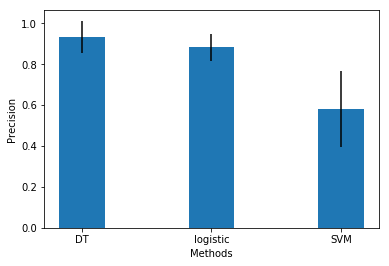

[0.9328571428571429, 0.8828571428571429, 0.5804761904761905]
[0.07954661777280646, 0.06558216532078871, 0.18424633515524966]


In [69]:
# The regulation classifier result plot
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [70]:
# train regulation classifier using all annotated data
X,y=transform_to_dataset_reg(labelData)
print(len(labelData))
regclf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
regclf.fit(X, y)
 
print('regulation classifier training completed')

102
regulation classifier training completed


In [71]:
# assemble feature-based function
def pairs2assemble(doc, source, target):
    hashTable={}
    hashTable['bias']=""
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    regulator = []
    Hash=copy.deepcopy(isolatorHash)
    isolatorSamples = []
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if(token in isolatorLex):
            pst=Hash[token]
            tokenString = token+'>'+str(pst)
            isolatorSamples.append({"isltr":tokenString,"index":tokenIndex})
            Hash[token] = Hash[token]+1
    preIsoIndex = []
    mark = 0
    for isolator in isolatorSamples:
        preIso = isoclf.predict(pairs2isolator(doc,isolator["isltr"]))
        #print(preIso)
        if(preIso=="t"):
            #print(isolator["isltr"]);
            mark = 1
            if(len(preIsoIndex)==0):
                preIsoIndex.append({'start':0,'end':isolator["index"]})
            else:
                preIsoIndex.append({'start':preIsoIndex[-1]['end'],'end':isolator["index"]})
    if mark == 1:
        preIsoIndex.append({'start':preIsoIndex[-1]['end']+1,'end':len(tokens)})
        
    #print(preIsoIndex)
    sourceElmts=source.split(">")
    targetElmts=target.split(">")
    sourceSymbol = sourceElmts[0]
    targetSymbol = targetElmts[0]
    sourceList = sourceElmts[2]
    targetList = targetElmts[2]    
    tokenSourceSet = []
    tokenTargetSet = [] 
    #print(tokens)
    #print(sourceSymbol+"\t"+targetSymbol+"\n")
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        # ( or ) problem
        if(len(token)==1):
            continue
        if(re.search(sourceSymbol,token) or re.search(token,sourceSymbol)):
            tokenSourceSet.append(tokenIndex)
        if(re.search(targetSymbol,token) or re.search(token,targetSymbol)):        
            tokenTargetSet.append(tokenIndex)
    try:
        tokenSource=tokenSourceSet[int(sourceList)]
        #print(tokenSource)
    except:
        print("error since the tokenSourceSet")
        print(tokens)
        print(source)
        print(tokenSourceSet)
        print(re.search(token,sourceSymbol))
        print(int(sourceList))        
    try:
        tokenTarget=tokenTargetSet[int(targetList)]
        #print(tokenTarget)
    except:
        print("error since the tokenTargetSet")
        print(tokens)
        print(target)
        print(tokenTargetSet)
        print(int(targetList))
    #print(str(tokenSource)+"\t"+str(tokenTarget))
    
    isoMark = 0
    for preIso in preIsoIndex:
        start = preIso['start']
        end = preIso['end']
        if((tokenSource in range(start,end+1) and tokenTarget not in range(start,end+1)) or (tokenTarget in range(start,end+1) and tokenSource not in range(start,end+1))):
            isoMark = 1
            break
   
        
    preNeg=negclf.predict(pairs2negation(doc,source,target,preIsoIndex))
    preReg=regclf.predict(pairs2reg(doc,source,target,preIsoIndex))
    #print(pairs2reg(doc,source,target,preIsoIndex))
    #print(preReg)
    #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
    # Common features for all words     
    
    hashTable['isoMark'] = isoMark
    hashTable['preReg'] = preReg[0]
    hashTable['preNeg'] = preNeg[0]
    return hashTable

In [72]:
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2assemble(sentenceTagger(sentence),'-3569->3569>0','-7124->7124>0')

{'bias': '', 'isoMark': 0, 'preNeg': 'Affirmative', 'preReg': 'Affirmative'}

In [73]:
def transform_to_dataset_assemble(tagged_sentences):
    X, y = [], []

    for tagged in tagged_sentences:
        X.append(pairs2assemble(sentenceTagger(tagged[3]), tagged[1], tagged[2]))
        y.append(tagged[0])
    return X, y


In [74]:
ReadRef = open(r"regulationAnnotatedAll.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    pmid=elmts.pop(0)
    sentence=elmts.pop(0)
    #print(pmid+"\n"+sentence+"\n")
    #print(elmts)
    label = elmts[2]
    source = elmts[0]
    target = elmts[1]
    labelData.append([label,source,target,sentence])
print(len(labelData))

400


In [82]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
all_sentence=labelData
clfDecisionTreeAsm = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
clfSVMAsm = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', svm.SVC(random_state=42))
])
clfLogisticAsm= Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', LogisticRegression(random_state=42))
])
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
performance = []
for train_index, test_index in kf.split(all_sentence):

    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))

    X, y = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in train_index])
    regclf.fit(X, y)
    X_test_reg, y_test_reg = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy:", regclf.score(X_test_reg, y_test_reg))
        
    X, y = transform_to_dataset_assemble([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTreeAsm.fit(X, y)
    clfLogisticAsm.fit(X, y)
    clfSVMAsm.fit(X, y)
    X_test, y_test = transform_to_dataset_assemble([j for i,j in enumerate(all_sentence) if i in test_index])
    
    print("Accuracy:", clfDecisionTreeAsm.score(X_test, y_test))
    print("Accuracy:", clfLogisticAsm.score(X_test, y_test))
    print("Accuracy:", clfSVMAsm.score(X_test, y_test))
    performance.append([regclf.score(X_test_reg, y_test_reg),clfDecisionTreeAsm.score( X_test, y_test),clfLogisticAsm.score( X_test, y_test),clfSVMAsm.score( X_test, y_test)])
    #for n in range(len(y_test)):
        
        #sys.stdout.write(y_test[n])
        #sys.stdout.write(regclf.predict(X_test_reg)[n])
        #print(clfDecisionTreeAsm.predict(X_test)[n])
        #print(X_test[n])
        #print([j for i,j in enumerate(all_sentence) if i in test_index][n])
    

KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.7875)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.85)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('Accuracy:', 0.8625)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.8125)
('Accuracy:', 0.8375)
('Accuracy:', 0.8375)
('Accuracy:', 0.8375)


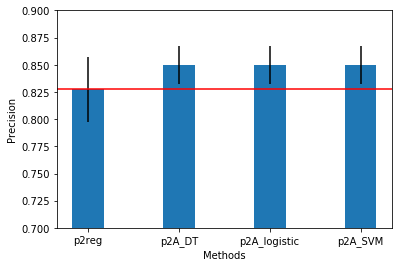

[0.8275, 0.85, 0.85, 0.85]
[0.02984334096578332, 0.017677669529663723, 0.017677669529663723, 0.017677669529663723]


In [83]:
performanceMean = []
performanceStd = []
for method in range(0,4):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(4)
y = performanceMean
e = performanceStd
plt.axhline(y=performanceMean[0], color='r', linestyle='-')
# the width of the bars
width = 0.35
plt.ylim((0.70,0.90))
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('p2reg','p2A_DT', 'p2A_logistic', 'p2A_SVM'))
plt.show()
print(performanceMean)
print(performanceStd)